In [124]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [125]:
#wczytanie danych 
prostate_train = pd.read_csv("fs_datasets/prostate_training.csv");
prostate_test = pd.read_csv("fs_datasets/prostate_training.csv");

In [157]:
prostate_train # 2136 cech, a obserwacji jedynie 82, więc stosując model do takich danych byłby on pewnie przetrenowany, stąd 
# zasadność zastosowania algorytmów selekcji cech 

,1005_at,1007_s_at,1008_f_at,1009_at,1020_s_at,103_at,1030_s_at,1037_at,1042_at,1052_s_at,...,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-YEL021w/URA3_at,class
0,5.690595,5.887783,1.888793,8.015559,6.188889,2.623801,5.498674,2.641777,3.016297,7.934739,...,8.887476,9.000000,4.937361,7.760930,2.216118,1.008204,2.614531,1.266825,3.312560,0
1,2.751449,4.748083,9.000000,6.635428,4.019577,3.160205,4.244695,3.612809,3.157642,4.819392,...,3.158574,5.494880,4.205949,3.918396,3.126255,1.127916,3.915246,1.330043,4.058002,0
2,2.974932,4.092879,9.000000,7.232488,4.126551,3.068430,3.725408,4.420445,3.100768,6.304814,...,3.317689,7.396932,3.944171,4.614419,2.462106,1.250100,3.143213,1.402124,4.263490,0
3,2.924624,4.816713,9.000000,6.379761,4.000468,3.174698,3.779456,4.931716,3.229913,6.796217,...,3.225665,6.217156,3.807965,3.955636,2.626443,1.212533,3.513873,1.837597,4.218087,0
4,2.405802,4.331438,9.000000,7.586552,4.253253,3.136249,3.839358,5.603772,3.234415,6.930014,...,3.871085,8.586813,3.702369,5.399742,2.638626,1.244480,3.792515,1.419479,4.905995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6.776298,6.580912,5.368542,9.000000,8.027894,5.785490,5.721871,2.891969,2.820813,6.224962,...,9.000000,9.000000,7.849249,8.958014,2.296714,1.070896,2.816547,1.371509,3.651689,1
78,4.934895,6.213611,7.075594,7.960663,5.948669,2.957755,4.777009,3.153070,2.989170,7.687444,...,7.592741,9.000000,3.493142,7.428854,2.327513,1.071376,2.942000,1.492309,3.890225,1
79,6.627963,7.111646,4.399441,7.943872,8.062452,3.045177,5.308533,3.222302,2.989100,5.259466,...,9.000000,9.000000,7.810729,9.000000,2.344222,1.068602,2.950674,2.202880,3.916887,1
80,5.343997,6.729185,4.221106,8.332856,7.258163,2.984253,5.349469,2.746430,2.653164,8.655440,...,8.063653,9.000000,5.677305,7.976632,2.208346,1.041746,5.531251,3.093582,3.490628,1


In [127]:
prostate_train['class'].unique()

array(['normal', 'tumor'], dtype=object)

In [128]:
#zamiana zmiennej kategorycznej 'class' na binarną  
prostate_train['class'].replace('normal',0, inplace=True)
prostate_train['class'].replace('tumor',1, inplace=True)
prostate_train.head()

,1005_at,1007_s_at,1008_f_at,1009_at,1020_s_at,103_at,1030_s_at,1037_at,1042_at,1052_s_at,...,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-YEL021w/URA3_at,class
0,5.690595,5.887783,1.888793,8.015559,6.188889,2.623801,5.498674,2.641777,3.016297,7.934739,...,8.887476,9.000000,4.937361,7.760930,2.216118,1.008204,2.614531,1.266825,3.312560,0
1,2.751449,4.748083,9.000000,6.635428,4.019577,3.160205,4.244695,3.612809,3.157642,4.819392,...,3.158574,5.494880,4.205949,3.918396,3.126255,1.127916,3.915246,1.330043,4.058002,0
2,2.974932,4.092879,9.000000,7.232488,4.126551,3.068430,3.725408,4.420445,3.100768,6.304814,...,3.317689,7.396932,3.944171,4.614419,2.462106,1.250100,3.143213,1.402124,4.263490,0
3,2.924624,4.816713,9.000000,6.379761,4.000468,3.174698,3.779456,4.931716,3.229913,6.796217,...,3.225665,6.217156,3.807965,3.955636,2.626443,1.212533,3.513873,1.837597,4.218087,0
4,2.405802,4.331438,9.000000,7.586552,4.253253,3.136249,3.839358,5.603772,3.234415,6.930014,...,3.871085,8.586813,3.702369,5.399742,2.638626,1.244480,3.792515,1.419479,4.905995,0


In [129]:
# oddzielenie zmiennej objaśniającej 'class' do drugiego zbioru 
X_train = dlbcl_train.drop("class",1)   
y_train = dlbcl_train["class"]  

X_test = dlbcl_test.drop("class",1)   
y_test = dlbcl_test["class"]


In [130]:
#metoda selekcji cech typu filter, algorytm szybki, mało złozony obliczeniowo, współczynnik korelazji Pearsona,
#współczynnik ten w tym przypadku będzie wynosił 0.6, czyli takie cechy, które mają wysoką korelację ze zmienną 'class'
#model natomiast stosowany jest do wybranego już podzbioru cech, 

#(12 cech wyjściowo) stosując tą metodę i wybrany współczynnik  


cor = prostate_train.corr()

cor_target = abs(cor["class"])

relevant_features = cor_target[cor_target>0.6]  
 
relevant_features

1740_g_at    0.610132
32598_at     0.656149
34840_at     0.632143
35276_at     0.635499
36174_at     0.632576
36491_at     0.631836
37366_at     0.675043
37639_at     0.804044
38827_at     0.611579
41468_at     0.674975
41706_at     0.678601
575_s_at     0.671903
class        1.000000
Name: class, dtype: float64

In [131]:

relevant_features.count()

13

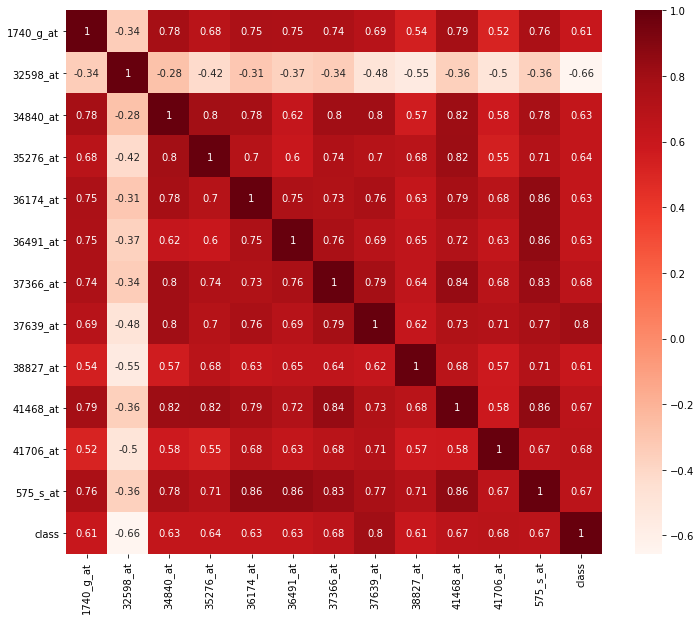

In [132]:
#został wybrany podzbiór 12 istotnych cech do zastosowania w modelach 
plt.figure(figsize=(12,10))
cor = prostate_train[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [133]:
new_prostate_train = prostate_train[relevant_features.index]
new_prostate_train = prostate_train[relevant_features.index]

In [134]:
relevant_features.index

Index(['1740_g_at', '32598_at', '34840_at', '35276_at', '36174_at', '36491_at',
       '37366_at', '37639_at', '38827_at', '41468_at', '41706_at', '575_s_at',
       'class'],
      dtype='object')

In [151]:
#budowanie modeli z uzyciem wyselekcjonowanych cech metodą typu filter i jakość klasyfikacji jako miara modelu 
modelNBC = GaussianNB()
modelNBC.fit(X_train, y_train)
y_pred = modelNBC.predict(X_test)
acc_modelNBC=accuracy_score(y_test,y_pred)
print(acc_modelNBC)

0.8536585365853658


In [152]:
model5NN = KNeighborsClassifier(n_neighbors=5)

model5NN.fit(X_train,y_train)

y_pred = model5NN.predict(X_test)
acc_model5NN=accuracy_score(y_test,y_pred)
print(acc_model5NN)

0.9024390243902439


In [153]:
modelJ48 = DecisionTreeClassifier(random_state=0)
modelJ48.fit(X_train, y_train)

y_pred = modelJ48.predict(X_test)
acc_modelJ48 = accuracy_score(y_test, y_pred)
print(acc_modelJ48)

1.0


In [135]:
#prawie wszystkie 12 zmiennych jest ze sobą mocno skolerowanych jak widać na powyższym wykresie, więc mozna wziać 
#pod uwagę jeszcze drugą metodą selekcji cech, bardziej złożoną obliczeniowo, np. typu wrapper, forward selection ,
#już podczas algorytmu seleckji cech wybiera się model,  


In [137]:
# metoda forward selection
dtc = DecisionTreeClassifier()


sf_dtc = sfs(dtc, # model 
           k_features=10, # 10 cech, 
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10)


sf_dtc = sf_dtc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2135 out of 2135 | elapsed:   28.2s finished

[2021-01-15 21:27:38] Features: 1/10 -- score: 0.8416666666666666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2134 out of 2134 | elapsed:   27.6s finished

[2021-01-15 21:28:06] Features: 2/10 -- score: 0.9388888888888889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2133 out of 2133 | elapsed:   28.0s finished

[2021-01-15 21:28:34] Features: 3/10 -- score: 0.976388888888889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [140]:
feat_cols = list(sf_dtc.k_feature_idx_)
print(feat_cols)

[2, 13, 16, 51, 76, 373, 431, 463, 832, 1942]


In [142]:
dtcm = DecisionTreeClassifier()
dtcm.fit(X_train.iloc[:, feat_cols], y_train)

y_test_pred = dtcm.predict(X_test.iloc[:, feat_cols])
dtcm_acc = accuracy_score(y_test, y_test_pred)
dtcm_acc


1.0

In [143]:

knn = KNeighborsClassifier(n_neighbors=5)

sf_knn = sfs(knn,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10)

sf_knn = sf_knn.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2135 out of 2135 | elapsed:   44.6s finished

[2021-01-15 21:33:00] Features: 1/10 -- score: 0.8875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2134 out of 2134 | elapsed:   44.9s finished

[2021-01-15 21:33:45] Features: 2/10 -- score: 0.9375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2133 out of 2133 | elapsed:   44.6s finished

[2021-01-15 21:34:30] Features: 3/10 -- score: 0.976388888888889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | ela

In [144]:
feat_cols = list(sf_knn.k_feature_idx_)
print(feat_cols)

[2, 13, 16, 20, 29, 30, 38, 431, 767, 1969]


In [146]:
knnm = KNeighborsClassifier(n_neighbors=5)
knnm.fit(X_train.iloc[:, feat_cols], y_train)


y_test_pred = knnm.predict(X_test.iloc[:, feat_cols])
knnm_acc = accuracy_score(y_test, y_test_pred)

knnm_acc

0.9878048780487805

In [147]:

gnb = GaussianNB()

sf_gnb = sfs(gnb,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10)


sf_gnb = sf_gnb.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2135 out of 2135 | elapsed:   30.5s finished

[2021-01-15 21:40:34] Features: 1/10 -- score: 0.888888888888889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2134 out of 2134 | elapsed:   32.0s finished

[2021-01-15 21:41:07] Features: 2/10 -- score: 0.9388888888888889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2133 out of 2133 | elapsed:   31.1s finished

[2021-01-15 21:41:38] Features: 3/10 -- score: 0.95[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of

In [148]:
feat_cols = list(sf_gnb.k_feature_idx_)
print(feat_cols)

[2, 10, 28, 33, 56, 66, 138, 142, 1225, 1340]


In [149]:
gnbm = GaussianNB()
gnbm.fit(X_train.iloc[:, feat_cols], y_train)

gnbm_acc = accuracy_score(y_test, y_test_pred)



In [156]:
#Podsumowanie 3 modeli przy wyborze selekcji cech typu filter oraz wrapper 


from tabulate import tabulate
print(tabulate([['naiwny klasyfikator Bayesa', gnbm_acc, acc_modelNBC],
                ['k-najbliższych sasiadów', knnm_acc, acc_model5NN], 
                ['drzewo decyzyjne', dtcm_acc, acc_modelJ48]
               
               ], 
               headers=['Model', 'Jakość klasyfikacji metodą wrapper (10 cech)', 'Jakość klasyfikacji metodą filter (12 cech)']))
#Obydwie metody wydają się być dobre do zastosowania na badanych danych . 

Model                         Jakość klasyfikacji metodą wrapper (10 cech)    Jakość klasyfikacji metodą filter (12 cech)
--------------------------  ----------------------------------------------  ---------------------------------------------
naiwny klasyfikator Bayesa                                        0.987805                                       0.853659
k-najbliższych sasiadów                                           0.987805                                       0.902439
drzewo decyzyjne                                                  1                                              1
